In [1]:
from IPython.display import display, HTML
import numpy as np
import re
div_to_color = {'0': '#FFFFFF',
                '1': '#e0e0e0',
                '2': '#DFFF00',
                '3': '#9FE2BF',
                '4': '#CCCCFF',
                '5': '#FFE4E1',
                '6': '#FF00FF',
                '7': '#e3abfb',    
                '8': '#FFBF00',
                '9': '#BBBAFF',
                '10': '#FFC2E2',
                '11': '#F4FDB1',
                '12': '#7C8BFF',
                '13': '#95FFF7',
                '14': '#FF5733',
                '15': '#33FF4C',
                '16': '#7733FF',
                '17': '#B2FF33',
                '18': '#33FF83', 
                '19': '#FF3371', 
                '20': '#33F3FF',
                '21': '#8AFF33',
                '22': '#33FFC1',
                '23': '#AF33FF',
                '24': '#FFD433',
                '25': '#33ACFF',
                '26': '#BDAACF',
                '27': '#ACE6DA',
                '28': '#CCCCFF',
                '29': '#FFE4E1',
                '30': '#FF00FF',
                '31': '#e3abfb',    
                '32': '#FFBF00',
                '33': '#BBBAFF',
}

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'


def color_html(label):
    return f'<span style="background-color:{div_to_color[label]} ">'

def display_HTML(text, div, offset=False, one_color=False, red_chars=False):
    displayed_text = ''
    user_displayed_text = ''
    previous = 'eq'
    mark_end = '</span>'
    previous_label = 0
    for token, label in zip(text.split(' '), div.split(' ')):
        #print(label)
        if one_color:
            if int(label) > 0:
                label = '1'
        if offset:
            if label != '0':
                label = str(int(label)  + 1)
        mark = color_html(label)
        if label == '0':
            displayed_text += f' {token}'
            if previous == 'div':
                user_displayed_text += f'</h-l-{str(int(previous_label)-1)}> {token}'
            else:
                user_displayed_text += f' {token}'
            previous = 'eq'
        else:
            if previous == 'div' and int(label)==previous_label:
                displayed_text += f'{mark} {token}{mark_end}'
                user_displayed_text += f' {token}'
            else:
                if int(label)!=previous_label and int(label) > 2 and previous_label!=0:
                    user_displayed_text += f' </h-l-{str(int(label)-2)}>'
                displayed_text += f' {mark}{token}{mark_end}'
                user_displayed_text += f' <h-l-{str(int(label)-1)}>{token}'
            previous = 'div'
        previous_label = int(label)

    if red_chars:
        displayed_text = f'{bcolors.WARNING} {displayed_text} {bcolors.ENDC}'
    
    if previous == 'div':
        user_displayed_text += f'</h-l-{str(int(previous_label)-1)}>'
        
        
    return display(HTML(displayed_text)), user_displayed_text

def add_lists(list_a, list_b):
    #print(list_b)
    #print(list_a)
    #print('as')
    list_add = []
    for (a, b) in zip(list_a, list_b):
        list_add.append(a+b)
    return list_add

In [10]:
import random
from collections import defaultdict
random.seed(41)

lbls = open(f'outputs/mqm_generalMT2022_annos', 'r').readlines()
diffs = []
original_count = 0
original_scores_ced = []
gpt_count = 0
bad_num, num_diff, total = 0, 0, 0
text2severity = defaultdict(list)
text2type = defaultdict(list)


types_all = []
for file_ in ['mqm_generalMT2022_en_de_missing_paired_phrases_reward']:

    with open(f'outputs/{file_}', 'r') as out_:
        c = 0
        lines = out_.readlines()
        for id_, txt in enumerate(lines):
            
            #print(txt)
            type_, severity_ = lbls[id_].split('\t')[0], lbls[id_].split('\t')[1].rstrip()
            if 'Accuracy' in type_ or 'No-error' in type_:
               
                if len(txt.split('\t')[0].split(' ')) < 15:
                    #print(txt.split('\t')[0].split(' '))
                    continue
                if '< unk >' in txt.split('\t')[1]:
                    continue
                types_all.append(type_)
                text2severity[txt.rstrip()].append(severity_)
                text2type[txt.rstrip()].append(type_)
                #text2severity[txt.rstrip()].append(severity_)

In [11]:
len(lbls)

27327

In [12]:
len(lines)

27327

In [13]:
len(text2severity)

6880

In [14]:
def most_frequent(List):
    return max(set(List), key = List.count)

text2severity_average = defaultdict(str)
for t, a in text2severity.items():
    if len(a) < 3:
        continue
    if 'No-error' in a and 'major' in a:
        continue
    text2severity_average[t] = most_frequent(a)

In [47]:
c=0
scores_minor, scores_major, scores_no = [],[],[]
diff_minor, diff_major, diff_no = [],[],[]
hl_minor, hl_major, hl_no = 0, 0, 0
factor_out_explanandum_errors = True

original_scores = []
final_scores =[]
o= []
count = 0
lbl_new = defaultdict(list)
noerror, minor_, major_ = defaultdict(list), defaultdict(list), defaultdict(list)
if True:
        for id_, (line, lbl) in enumerate(text2severity_average.items()):
            lbl =lbl.rstrip()
            #print(lbl)
            lbl_new[id_] = text2severity[line]
            scores, score_color = [], []
            line_ = line
            line = line.split('\t')
            try:
                raw_a = np.array([float(x) for x in line[5].split(' ')])
                raw_b = np.array([float(x) for x in line[6].split(' ')])
            except IndexError:
                continue
            
            #if len(line[0].split(' ')) < 20 or len(line[0].split(' ')) > 40:
            #    continue
            total+=1
        
            original_score = float(line[4])
            if factor_out_explanandum_errors:
                new_bar = 5
                if original_score > new_bar and lbl!='No-error' or original_score < new_bar and lbl=='No-error':
                    continue
            
            revisions = int(line[5])
            original_scores.append(original_score)        
            previous_score = original_score
            expl_a = [0] * len(line[0].split(' '))
            expl_b = [0] * len(line[1].split(' '))
                    
            scores.append(str(original_score))
            score_color = '1'
                    
           
            for i in range(revisions):                        
                score = line[5 + 3*i + 1]               
                if i == 0:
                    bar = 1
                else:
                    bar = 1
                if float(previous_score) > 10:
                    break
                if float(score) - float(previous_score) < bar or original_score > 10:
                    break
                else:
                    #lbl='chatGPT_paraphrase'
                    if i==0:
                        if lbl == 'No-error':
                            hl_no+=1
                        elif lbl == 'minor':
                            hl_minor+=1
                        else:
                            hl_major+=1
                        count+=1
                expl_a = add_lists(expl_a, [((i +1)*int(a)) for a in line[5 + 3*i + 2].split(' ')])
                expl_b = add_lists(expl_b, [((i +1)*int(a)) for a in line[5 + 3*i + 3].split(' ')])

                previous_score = score
                scores.append(str(score))
                score_color += f' {str(i+2)}'
                
            final_scores.append(float(scores[-1]))
            diff = float(scores[-1]) - float(original_score) 

                                 
            s_ = 0
            if diff <=0: 
                if float(scores[0]) < 0:
                    expl_a =  [1]*len(line[0])
                    expl_b =  [1]*len(line[1])
                #continue
                
            en_num = [int(i) for i in line[0].split() if i.isdigit()]
            nen_num = [int(i) for i in line[1].split() if i.isdigit()]

            if lbl == 'No-error' or lbl == 'minor':
                a=1
                #continue
            else:
                bad_num +=1
                src_num = re.findall(r'\d+', line[0])
                tgt_num = re.findall(r'\d+', line[1])
            
            num_diff +=1
            original_scores_ced.append(float(original_score))
            print(f'____________________________________{c}___________________________________________________')
            
            if lbl == 'major': 
                print(text2severity[line_])
                print(text2type[line_])
                print(bcolors.FAIL + bcolors.BOLD + "🤬  Major" + bcolors.ENDC)
                scores_major.append(float(original_score))
                if float(diff) >1:
                    diff_major.append(float(diff))

            elif lbl == 'minor':
                print(text2severity[line_])
                print(bcolors.FAIL + bcolors.BOLD + "😤  Minor" + bcolors.ENDC)   
                scores_minor.append(float(original_score))
                if float(diff) >1:
                    diff_minor.append(float(diff))


            else:
                #if 'minor' not in text2severity[line_]:
                print(text2severity[line_])
                print(bcolors.OKBLUE + bcolors.BOLD + "🤓 OK" + bcolors.ENDC)           
                scores_no.append(float(original_score))
                if float(diff) >1:
                    diff_no.append(float(diff))



            print(diff)
                        
            display_HTML(' '.join(scores), ' '.join(score_color.split(' ')))            
            diffs.append(diff)
            
            _, source_text = display_HTML(line[0], ' '.join([str(x) for x in expl_a]), offset=True)
            _, target_text = display_HTML(line[1], ' '.join([str(x) for x in expl_b]), offset=True) 
            
            
            
            o.append(lbl)
            
            if lbl == 'No-error':
                noerror[id_].append([source_text, target_text])
            elif lbl == 'minor':
                minor_[id_].append([source_text, target_text])  
            elif lbl == 'major':
                major_[id_].append([source_text, target_text]) 
            c+=1

____________________________________0___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________1___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________2___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________3___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________4___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________5___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
3.545938999999999


____________________________________6___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________7___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
3.6402100000000006


____________________________________8___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
6.436983560000001


____________________________________9___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________10___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________11___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________12___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________13___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________14___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________15___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
6.23099597


____________________________________16___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
1.2073766


____________________________________17___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________18___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________19___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________20___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________21___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
7.4436831


____________________________________22___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________23___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________24___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________25___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________26___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
3.889723


____________________________________27___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
4.3099815999999995


____________________________________28___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________29___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________30___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________31___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
2.932358


____________________________________32___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________33___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
3.3553324999999994


____________________________________34___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________35___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________36___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________37___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________38___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
1.57428


____________________________________39___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________40___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________41___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
2.952262000000001


____________________________________42___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
1.1232680000000013


____________________________________43___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________44___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
5.194516


____________________________________45___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________46___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________47___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
3.9381465


____________________________________48___________________________________________________
['No-error', 'No-error', 'minor', 'minor']
🤓 OK
0.0


____________________________________49___________________________________________________
['No-error', 'No-error', 'minor', 'No-error']
🤓 OK
0.0


____________________________________50___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________51___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________52___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________53___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________54___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________55___________________________________________________
['No-error', 'minor', 'No-error']
🤓 OK
0.0


____________________________________56___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________57___________________________________________________
['minor', 'No-error', 'minor', 'No-error', 'minor', 'No-error', 'No-error', 'No-error']
🤓 OK
4.165610599999999


____________________________________58___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
3.2943747000000005


____________________________________59___________________________________________________
['minor', 'minor', 'minor', 'minor', 'minor', 'minor']
😤  Minor
8.4986133


____________________________________60___________________________________________________
['No-error', 'minor', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________61___________________________________________________
['major', 'major', 'minor', 'minor', 'minor']
😤  Minor
13.2726611


____________________________________62___________________________________________________
['minor', 'minor', 'minor', 'minor']
😤  Minor
5.7086410999999995


____________________________________63___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
4.4275210000000005


____________________________________64___________________________________________________
['minor', 'minor', 'minor']
😤  Minor
24.02539


____________________________________65___________________________________________________
['minor', 'minor', 'minor', 'minor', 'minor', 'No-error', 'No-error', 'No-error', 'No-error']
😤  Minor
1.6640187999999996


____________________________________66___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
1.6391500000000008


____________________________________67___________________________________________________
['minor', 'minor', 'major', 'major', 'minor', 'minor', 'minor']
😤  Minor
8.048898000000001


____________________________________68___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________69___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
4.2702656999999995


____________________________________70___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
5.273135


____________________________________71___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
4.851059


____________________________________72___________________________________________________
['minor', 'minor', 'minor']
😤  Minor
16.68414


____________________________________73___________________________________________________
['minor', 'minor', 'minor']
😤  Minor
22.769786


____________________________________74___________________________________________________
['minor', 'minor', 'minor']
😤  Minor
24.178635


____________________________________75___________________________________________________
['minor', 'minor', 'minor']
😤  Minor
23.492072999999998


____________________________________76___________________________________________________
['minor', 'minor', 'minor', 'minor']
😤  Minor
21.088833


____________________________________77___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________78___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________79___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
2.4033929999999994


____________________________________80___________________________________________________
['major', 'major', 'major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
9.549372100000001


____________________________________81___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________82___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
2.2045640000000013


____________________________________83___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
5.709995000000001


____________________________________84___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________85___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
2.0093901999999995


____________________________________86___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
1.2797959999999993


____________________________________87___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
4.150611


____________________________________88___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________89___________________________________________________
['major', 'major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
10.874158


____________________________________90___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
24.685064


____________________________________91___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
22.822239500000002


____________________________________92___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
2.1595639999999996


____________________________________93___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
1.8862740000000002


____________________________________94___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
1.0047599999999992


____________________________________95___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
4.12895


____________________________________96___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
5.923780999999999


____________________________________97___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
2.2252486


____________________________________98___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
4.846051500000001


____________________________________99___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
10.3335813


____________________________________100___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
5.5509181


____________________________________101___________________________________________________
['major', 'major', 'major']
['Accuracy/Source language fragment', 'Accuracy/Source language fragment', 'Accuracy/Mistranslation']
🤬  Major
18.935494


____________________________________102___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________103___________________________________________________
['major', 'major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Source language fragment', 'Accuracy/Mistranslation', 'Accuracy/Source language fragment']
🤬  Major
6.3511197


____________________________________104___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
2.673793


____________________________________105___________________________________________________
['major', 'major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Source language fragment', 'Accuracy/Source language fragment', 'Accuracy/Mistranslation']
🤬  Major
9.440436


____________________________________106___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
2.4020855


____________________________________107___________________________________________________
['major', 'major', 'major']
['Accuracy/Source language fragment', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
6.890569


____________________________________108___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
6.725461


____________________________________109___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________110___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________111___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________112___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________113___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Source language fragment', 'Accuracy/Source language fragment']
🤬  Major
6.839791999999999


____________________________________114___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________115___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
1.9373345


____________________________________116___________________________________________________
['major', 'major', 'major', 'major']
['Accuracy/Source language fragment', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
7.8377134


____________________________________117___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
8.103702


____________________________________118___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________119___________________________________________________
['major', 'major', 'major', 'major', 'major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
3.3828724999999995


____________________________________120___________________________________________________
['major', 'major', 'major', 'major']
['Accuracy/Source language fragment', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Source language fragment']
🤬  Major
8.4498256


____________________________________121___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________122___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
4.2961404


____________________________________123___________________________________________________
['major', 'major', 'major']
['Accuracy/Source language fragment', 'Accuracy/Source language fragment', 'Accuracy/Mistranslation']
🤬  Major
5.198133599999999


____________________________________124___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Source language fragment', 'Accuracy/Mistranslation']
🤬  Major
6.4441414


____________________________________125___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________126___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________127___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
2.778454


____________________________________128___________________________________________________
['major', 'major', 'major']
['Accuracy/Source language fragment', 'Accuracy/Source language fragment', 'Accuracy/Source language fragment']
🤬  Major
26.8139235


____________________________________129___________________________________________________
['major', 'major', 'major']
['Accuracy/Source language fragment', 'Accuracy/Source language fragment', 'Accuracy/Source language fragment']
🤬  Major
23.99466


____________________________________130___________________________________________________
['major', 'major', 'major', 'major']
['Accuracy/Source language fragment', 'Accuracy/Source language fragment', 'Accuracy/Source language fragment', 'Accuracy/Source language fragment']
🤬  Major
21.8711475


____________________________________131___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
7.1581101


____________________________________132___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
13.925943


____________________________________133___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
7.497813000000001


____________________________________134___________________________________________________
['major', 'major', 'major']
['Accuracy/Source language fragment', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
22.264491999999997


____________________________________135___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________136___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________137___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________138___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
3.978634499999999


____________________________________139___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
2.9120150000000002


____________________________________140___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________141___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________142___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________143___________________________________________________
['major', 'major', 'minor']
['Accuracy/Source language fragment', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
17.533965000000002


____________________________________144___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
3.406051399999999


____________________________________145___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________146___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
1.1205689999999997


____________________________________147___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________148___________________________________________________
['minor', 'minor', 'minor']
😤  Minor
8.3554909


____________________________________149___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________150___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________151___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________152___________________________________________________
['minor', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
8.1519926


____________________________________153___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________154___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________155___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
3.442376000000001


____________________________________156___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
3.2071983


____________________________________157___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
5.162196


____________________________________158___________________________________________________
['major', 'major', 'major', 'major', 'major']
['Accuracy/Source language fragment', 'Accuracy/Source language fragment', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Omission']
🤬  Major
4.2152978


____________________________________159___________________________________________________
['major', 'major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
5.351902


____________________________________160___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Omission']
🤬  Major
1.0059695


____________________________________161___________________________________________________
['major', 'major', 'minor']
['Accuracy/Addition', 'Accuracy/Omission', 'Accuracy/Mistranslation']
🤬  Major
8.5579006


____________________________________162___________________________________________________
['major', 'major', 'major', 'minor']
['Accuracy/Addition', 'Accuracy/Addition', 'Accuracy/Addition', 'Accuracy/Mistranslation']
🤬  Major
7.0731695299999995


____________________________________163___________________________________________________
['No-error', 'No-error', 'minor', 'No-error']
🤓 OK
1.4164539999999999


____________________________________164___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________165___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________166___________________________________________________
['major', 'major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
7.716526000000001


____________________________________167___________________________________________________
['major', 'major', 'major']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
4.8235338


____________________________________168___________________________________________________
['major', 'major', 'minor', 'minor']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
15.064670999999999


____________________________________169___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________170___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
5.064941000000001


____________________________________171___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________172___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
3.6718790000000006


____________________________________173___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
1.6990995000000009


____________________________________174___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________175___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
5.372207999999999


____________________________________176___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
4.440947000000001


____________________________________177___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________178___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________179___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________180___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________181___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________182___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
4.618599


____________________________________183___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
4.8725274


____________________________________184___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________185___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________186___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________187___________________________________________________
['major', 'major', 'minor']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
6.3943776


____________________________________188___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________189___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________190___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________191___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
1.87718


____________________________________192___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________193___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
2.7696890000000005


____________________________________194___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
5.2113525


____________________________________195___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
4.3165119999999995


____________________________________196___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
3.9618295999999997


____________________________________197___________________________________________________
['minor', 'minor', 'minor', 'minor']
😤  Minor
14.1071675


____________________________________198___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________199___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________200___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
2.1363054000000004


____________________________________201___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________202___________________________________________________
['No-error', 'minor', 'minor']
😤  Minor
22.271948000000002


____________________________________203___________________________________________________
['minor', 'minor', 'minor']
😤  Minor
2.1804406399999996


____________________________________204___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________205___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________206___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________207___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
3.6428719999999988


____________________________________208___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
2.7543004999999994


____________________________________209___________________________________________________
['major', 'minor', 'minor']
😤  Minor
8.9244558


____________________________________210___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________211___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
1.4256529999999987


____________________________________212___________________________________________________
['minor', 'minor', 'minor']
😤  Minor
10.6493834


____________________________________213___________________________________________________
['minor', 'minor', 'minor']
😤  Minor
10.889404


____________________________________214___________________________________________________
['minor', 'minor', 'minor', 'minor']
😤  Minor
8.166711


____________________________________215___________________________________________________
['minor', 'minor', 'minor']
😤  Minor
8.463681


____________________________________216___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________217___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
4.9249054


____________________________________218___________________________________________________
['minor', 'minor', 'minor']
😤  Minor
10.7772253


____________________________________219___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'minor', 'No-error']
🤓 OK
2.228910999999999


____________________________________220___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________221___________________________________________________
['major', 'minor', 'minor']
😤  Minor
9.3744585


____________________________________222___________________________________________________
['No-error', 'No-error', 'No-error', 'No-error', 'No-error']
🤓 OK
4.0190873


____________________________________223___________________________________________________
['minor', 'minor', 'minor']
😤  Minor
1.21675873


____________________________________224___________________________________________________
['No-error', 'minor', 'minor', 'No-error']
🤓 OK
0.0


____________________________________225___________________________________________________
['No-error', 'No-error', 'No-error']
🤓 OK
0.0


____________________________________226___________________________________________________
['minor', 'minor', 'minor']
😤  Minor
12.610567000000001


____________________________________227___________________________________________________
['minor', 'minor', 'minor']
😤  Minor
22.286171


____________________________________228___________________________________________________
['minor', 'minor', 'minor']
😤  Minor
12.14817695


____________________________________229___________________________________________________
['minor', 'minor', 'minor']
😤  Minor
11.85661822


____________________________________230___________________________________________________
['minor', 'minor', 'minor']
😤  Minor
2.5793870000000005


____________________________________231___________________________________________________
['minor', 'minor', 'minor', 'minor']
😤  Minor
7.68688621


____________________________________232___________________________________________________
['major', 'major', 'minor', 'minor']
['Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation', 'Accuracy/Mistranslation']
🤬  Major
0.0


In [48]:
print(hl_no/len(list(noerror.values())[0]))
print(hl_major/len(list(major_.values())[0]))
print(hl_minor/len(list(minor_.values())[0]))

61.0
42.0
29.0


In [49]:
a = len(list(noerror.values())) + len(list(major_.values())) + len(list(minor_.values()))
print(25*(len(list(noerror.values()))/a))
print(25*(len(list(major_.values()))/a))
print(25*(len(list(minor_.values()))/a))

17.27467811158798
4.6137339055794
3.111587982832618


In [52]:
print(a)
print(len(list(noerror.values())))
print(len(list(major_.values())))
print(len(list(minor_.values())))

233
161
43
29


In [51]:
print(len([a for a in scores_major if float(a)> 10]))
print(len([a for a in scores_minor if float(a)> 10]))
print(len([a for a in scores_no if float(a)> 10]))

0
0
81


In [41]:
print(len([a for a in scores_major if float(a)> 10])/len(list(major_.values())[0]))
print(len([a for a in scores_minor if float(a)> 10])/len(list(minor_.values())[0]))
print(len([a for a in scores_no if float(a)> 10])/len(list(noerror.values())[0]))

0.0
0.0
81.0


/fs/clip-xling/projects/semdiv/anaconda3/envs/semdiv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/fs/clip-xling/projects/semdiv/anaconda3/envs/semdiv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/fs/clip-xling/projects/semdiv/anaconda3/envs/semdiv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

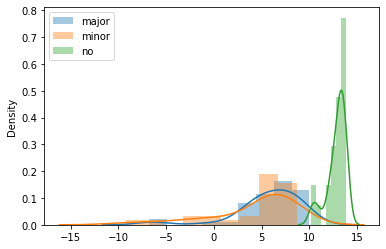

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(scores_major, kde=True, label='major')
sns.distplot(scores_minor,  kde=True,  label='minor')
sns.distplot(scores_no,  kde=True,  label='no')
plt.legend()
plt.show()

/fs/clip-xling/projects/semdiv/anaconda3/envs/semdiv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/fs/clip-xling/projects/semdiv/anaconda3/envs/semdiv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/fs/clip-xling/projects/semdiv/anaconda3/envs/semdiv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

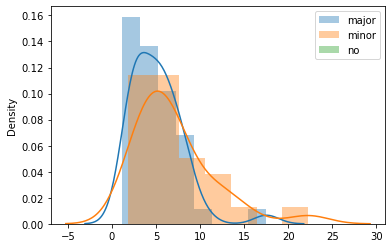

In [250]:
sns.distplot(diff_major, kde=True, label='major')
sns.distplot(diff_minor,  kde=True,  label='minor')
sns.distplot(diff_no,  kde=True,  label='no')
plt.legend()
plt.show()

In [211]:
# TODO: create data also save more info on META data (e.g., highlights or not and multiple labels)

In [251]:
import os
shift_no, shift_mj, shift_mn = 0, 0, 0
batches_num = 4
for i in range(batches_num):
    c = 0
    print('\n------')
    if factor_out_explanandum_errors:
        dir_=f'mqm/oracle_{i}'
    else:
        dir_=f'mqm/real_{i}'
    os.makedirs(f'for_user_study/{dir_}', exist_ok=True)
    meta_id, meta_lbl, out_src, out_tgt, metal_all_lbl = f'for_user_study/{dir_}/meta_id', f'for_user_study/{dir_}/meta_lbl', f'for_user_study/{dir_}/src', f'for_user_study/{dir_}/tgt',  f'for_user_study/{dir_}/meta_all_lbl'

    
    noerror_chun = list(noerror)[shift_no:13 + shift_no]
    
    major_chun = list(major_)[shift_mj : 7 + shift_mj]
    
    minor_chun = list(minor_)[shift_mn : 5 + shift_mn]
    #print(hal_chun)
    #print('\n')
    
    shift_no += 13
    shift_mj += 7
    shift_mn += 5
    #continue
    
    merged_ = []
 
    for key in major_chun:
        id_, src, tgt, l = key, major_[key][0][0], major_[key][0][1], lbl_new[key]
        merged_.append([l, id_, src, tgt])

    for key in minor_chun:
        id_, src, tgt, l = key, minor_[key][0][0], minor_[key][0][1], lbl_new[key]
        merged_.append([l, id_, src, tgt])
        
    for key in noerror_chun:
        id_, src, tgt, l = key, noerror[key][0][0], noerror[key][0][1], lbl_new[key]
        merged_.append([l, id_, src, tgt])
    
    #continue
    for c, i in enumerate(merged_):
        c+=1
        print(c)
        id_, labels, source_text, target_text = i[1], i[0], i[2], i[3]
     
        meta_id_file = open(f'{meta_id}_{c}.txt', 'w')
        meta_lbl_file = open(f'{meta_lbl}_{c}.txt', 'w')
        meta_lbl_all_file = open(f'{metal_all_lbl}_{c}.txt', 'w')
        out_src_file = open(f'{out_src}_{c}.txt', 'w')
        out_tgt_file = open(f'{out_tgt}_{c}.txt', 'w')

        meta_id_file.write(f'{id_}')
        meta_lbl_file.write(f'{most_frequent(labels)}')
        meta_lbl_all_file.write('\t'.join(labels))
        out_src_file.write(f'{source_text}')
        out_tgt_file.write(f'{target_text}')

        meta_id_file.close()
        meta_lbl_file.close()
        out_src_file.close()
        out_tgt_file.close()


------
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25

------
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25

------
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25

------
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
